In [1]:
# IMPORTS
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
import csv
import numpy as np

In [2]:
vectorizer = CountVectorizer()

In [3]:
# LOAD data
path = "../data/hackathon/data/labelled/train_tok_insult_col.csv"
df = pd.read_csv(path)
# del df["Unnamed: 3"]
df['Insult'] = pd.Series([0] * df.shape[0])
df.Insult[df.Label == 2] = 1
df.Insult[df.Label == 3] = 1
df.head()

/home/katia/.virtualenvs/securaxis/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/katia/.virtualenvs/securaxis/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Unnamed: 0,Label,Text,Line,Insult
0,0,0.0,this is la la land . you surely don ' t take t...,149285,0
1,1,0.0,we'd probably have more chance of winning if l...,62574,0
2,2,0.0,interested to see how govt try to justify it ....,217149,0
3,3,0.0,rt it is not a muslim ban,280815,0
4,4,3.0,oh you are one useless cow .,367859,1


In [4]:
df_non_empty = df[df.Text.notnull()]

In [5]:
df = df_non_empty

In [6]:
df.Label.value_counts()

0.0    2965
1.0     947
3.0     822
2.0     739
Name: Label, dtype: int64

In [7]:
df.Insult.value_counts()

0    4033
1    1561
Name: Insult, dtype: int64

In [8]:
y = df.Insult
X = df.Text
vectorizer.fit(X)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [9]:
vectorizer.get_feature_names()

['000',
 '0am',
 '0bn',
 '0k',
 '0p',
 '0s',
 '0tk',
 '0yrs',
 '10',
 '100m',
 '100s',
 '11',
 '12309',
 '1960s',
 '1st',
 '200k',
 '20bn',
 '20m',
 '228',
 '250thousandnewpolice',
 '26',
 '2am',
 '2b',
 '2day',
 '2do',
 '2moro',
 '2nd',
 '2read',
 '2start',
 '2strikes',
 '2yr',
 '300kfor10k',
 '350sikhwomen',
 '359',
 '3hr',
 '3rd',
 '3rds',
 '4ever',
 '4her',
 '4m',
 '4mths',
 '4sharia',
 '4th',
 '4the',
 '4u',
 '5000',
 '51',
 '5eumen',
 '5live',
 '5m',
 '5p',
 '60k',
 '6dec1968',
 '6k',
 '6seconds',
 '6th',
 '750',
 '7yo',
 '7yr',
 '8hrs',
 '8th',
 '8yrs',
 '90',
 '909',
 'a50',
 'aa',
 'aaa',
 'aaaargh',
 'aaannnd',
 'aaron',
 'aathin',
 'abacus',
 'abandon',
 'abating',
 'abbot',
 'abbotopotamus',
 'abbots',
 'abbott',
 'abbottappreciation',
 'abbottcus',
 'abbottopotomus',
 'abbotts',
 'aberdeen',
 'abertae',
 'abetted',
 'abhorrent',
 'abide',
 'abilities',
 'ability',
 'abit',
 'able',
 'abolish',
 'abolishing',
 'abominably',
 'abomination',
 'abortion',
 'about',
 'above',
 

In [10]:
X_train_vect = vectorizer.transform(X)

In [11]:
# TRAIN model
nb = MultinomialNB()

In [12]:
%time nb.fit(X_train_vect, y)

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 8 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [13]:
import pickle
with open("../data/hackathon/data/nb_model_29_07_2017.pkl", "wb") as handle:
    pickle.dump(nb, handle)

In [108]:
# Crossvalidation

In [83]:
from sklearn.model_selection import LeaveOneOut
# from sklearn.preprocessing import Imputer

In [84]:
y_true = []
y_pred = []

loo = LeaveOneOut()
cnt = 1
for train_inds, test_inds in loo.split(X):
    X_train = X[train_inds]
    X_train = X_train.replace([np.inf, -np.inf], np.nan)
    X_train = X_train[X_train.notnull()]
    #vectorize
    vectorizer.fit(X_train)
    X_train_vect = vectorizer.transform(X_train)
    y_train = y[train_inds]
    y_train = y_train[X_train.index]
    
    # train
    nb = MultinomialNB()
    nb.fit(X_train_vect, y_train)
    
    # fit
    X_test = X[test_inds]
    pred_label = 0
    if X_test.notnull().sum() == X_test.shape[0]:
        X_test_vect = vectorizer.transform(X_test)
        y_test = y[test_inds]
        pred_label = int(nb.predict(X_test_vect)[0])
    y_pred.append(pred_label)
    y_true.append(y_test.tolist()[0])
#     print(nb.predict(X_test_vect)[0])
    cnt += 1
    if cnt % 100 == 0:
        print(cnt)
        
print(len(y_true), len(y_pred))

/home/katia/.virtualenvs/securaxis/lib/python3.5/site-packages/sklearn/naive_bayes.py:455: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11189 11189


In [89]:
# plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [88]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
plt.style.use('ggplot')

In [90]:
cnf_matrix = confusion_matrix(y_true, y_pred)

Confusion matrix, without normalization
[[11189]]


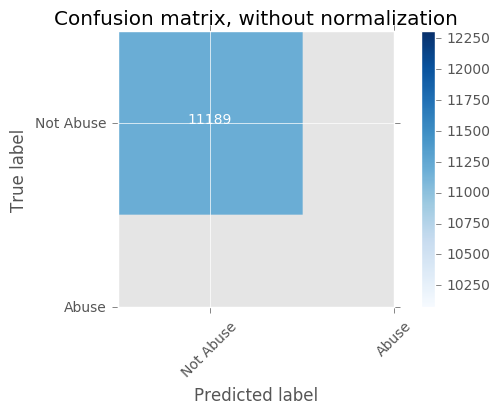

In [91]:
%matplotlib inline  
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Not Abuse","Abuse"],
                      title='Confusion matrix, without normalization')
plt.savefig("../results/labelled/confusion_matrix_machine_learning_model.png")

In [14]:
prefices = [
    "jan",
    "feb",
    "mar",
    "apr",
    "may",
    "jun"
]

In [16]:
for prefix in prefices:
    # label tweet data
    df_tweet_preped = pd.read_csv("../data/hackathon/data/workable/" + prefix + "-17_dates_6.csv", encoding = "ISO-8859-1")
    X_preped = df_tweet_preped.TweetTok
    X_preped_vect = vectorizer.transform(X_preped.values.astype('U'))
    y_pred_preped = nb.predict(X_preped_vect)
    # y_pred_preped = y_pred_preped.astype(int)
    print(y_pred_preped.sum(), y_pred_preped.shape, y_pred_preped.sum()/float(y_pred_preped.shape[0]))
    df_tweet_preped[pd.Series(y_pred_preped) == 1].to_csv("../data/hackathon/data/workable/sentiment/" + prefix + "-17_sentiment.csv")

/home/katia/.virtualenvs/securaxis/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


4101 (161678,) 0.0253652321281
5411 (181745,) 0.0297724834246
3916 (159760,) 0.0245117676515
4478 (167079,) 0.0268016926125
6035 (195268,) 0.0309062416781
1747 (34693,) 0.0503559795924


In [35]:
df_tweet_preped[pd.Series(y_pred_preped) == 1].to_csv("../data/hackathon/data/workable/sentiment/" + prefix + "-17_sentiment.csv")